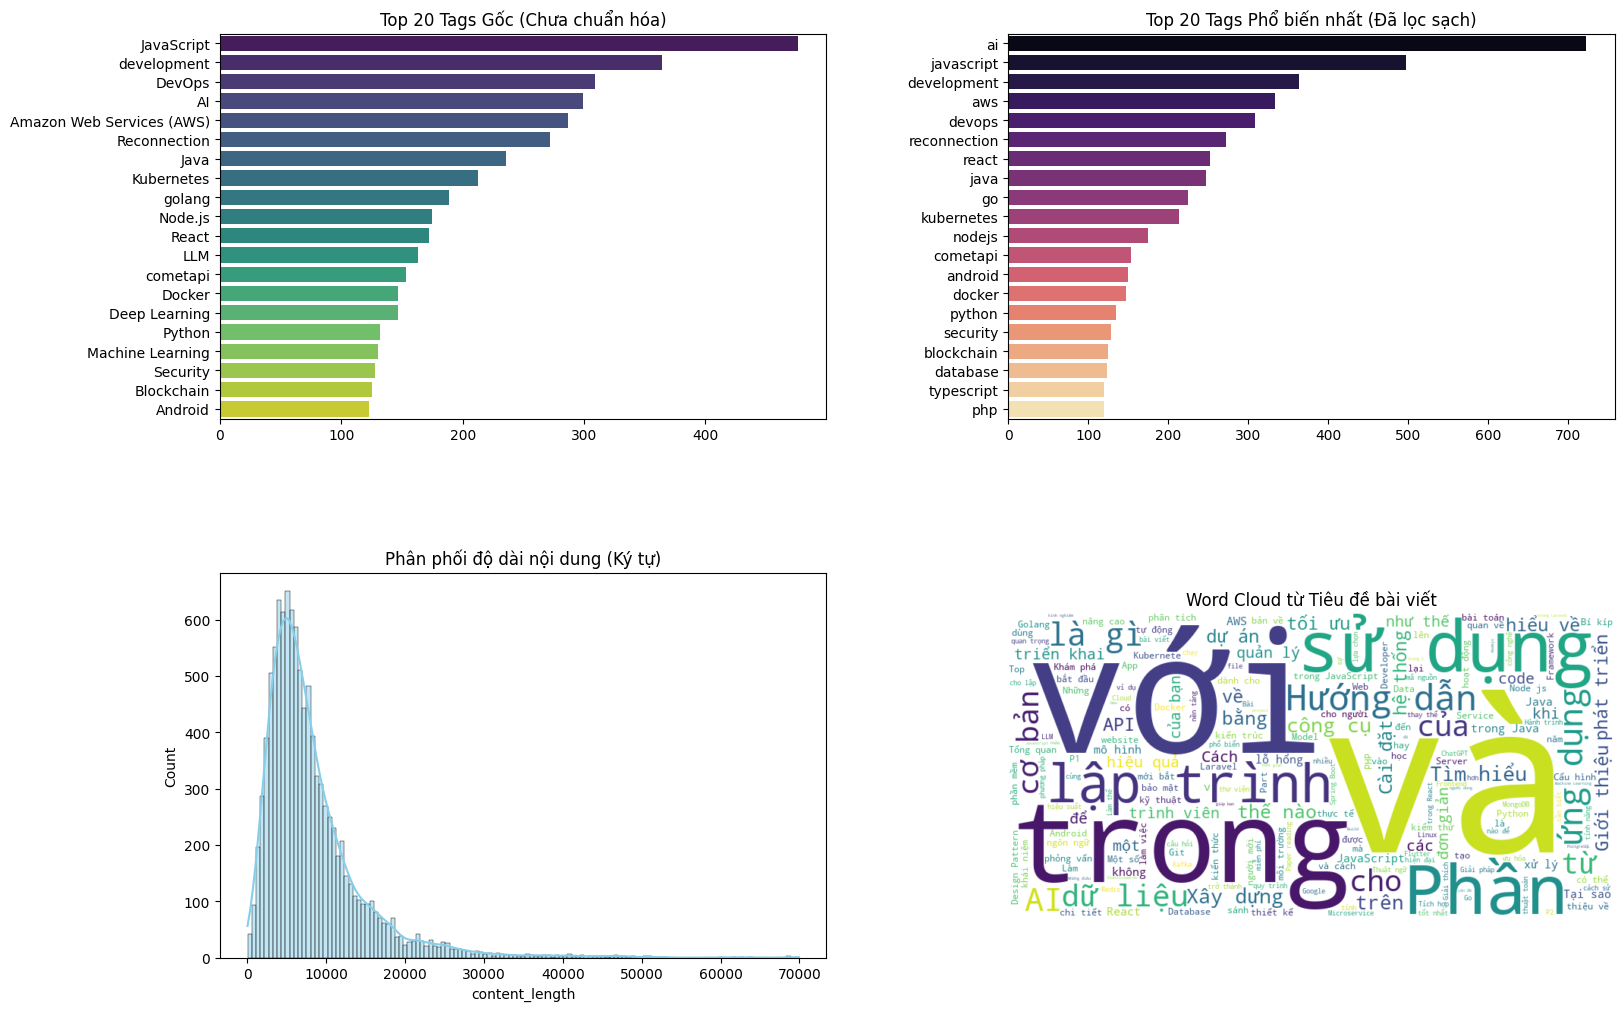

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
import numpy as np
df = pd.read_csv('viblo_posts_with_tags.csv')
def clean_tag_text(tag):
    if not isinstance(tag, str):
        return ""
    tag = tag.lower().strip()
    tag = re.sub(r'^[@#]', '', tag)
    return tag

tag_mapping = {
    'reactjs': 'react', 'react.js': 'react', 'vuejs': 'vue', 'vue.js': 'vue',
    'angularjs': 'angular', 'node.js': 'nodejs', 'artificial intelligence': 'ai',
    'machine learning': 'ai', 'ml': 'ai', 'deep learning': 'ai', 'aitechnology': 'ai',
    'agenticai': 'ai', 'golang': 'go', 'c++': 'cpp', 'c/cpp': 'cpp',
    'amazon web services (aws)': 'aws', 'amazon web services': 'aws',
    'aws resource explorer': 'aws', 'web development': 'webdev',
    'webdevelopment': 'webdev', 'webapp': 'webdev', 'coding': 'programming',
    'codingdev': 'programming', 'programing': 'programming', 'js': 'javascript',
    'ts': 'typescript', 'dot net': 'dotnet', '.net': 'dotnet', 'c#': 'csharp',
    'android programming': 'programming', 'businessanalyst': 'ba',
    'hỗ trợ phát triển ai': 'ai', 'bad programming': 'programing', 
    'dotnet': 'webdev', 'software developmen': 'software development', 
    'stocktradingsoftware': 'trading', 'paxos gold': 'trading',
    'llm': 'ai'
}

EXCLUDE_TAGS = {
    'learnenglish', 'khaibutdauxuan', 'learn japanese', 
    'learn english', 'contentcreator', 'mayfest', 'education', 
    'learning', 'english', 'japanese'
}

def process_tags_initial(tag_str):
    if pd.isna(tag_str):
        return []
    raw_tags = tag_str.split('|')
    cleaned_tags = []
    for t in raw_tags:
        clean_t = clean_tag_text(t)
        if not clean_t or 'mayfest' in clean_t or clean_t in EXCLUDE_TAGS:
            continue
        standard_tag = tag_mapping.get(clean_t, clean_t)
        cleaned_tags.append(standard_tag)
    return sorted(list(set(cleaned_tags)))

df['tags_pre_processed'] = df['tags'].apply(process_tags_initial)
all_clean_tags = [tag for tags in df['tags_pre_processed'] for tag in tags]
top_20_counter = Counter(all_clean_tags).most_common(20)
top_20_names = {item[0] for item in top_20_counter}

def keep_only_top_20(tags_list):
    return [t for t in tags_list if t in top_20_names]

df['tags_final'] = df['tags_pre_processed'].apply(keep_only_top_20)
df['content_length'] = df['content'].apply(lambda x: len(str(x)))

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

all_raw_tags = [
    tag.strip() for tags in df['tags'].dropna().str.split('|') 
    for tag in tags 
    if 'mayfest' not in tag.lower() 
    and tag.strip().lower() not in EXCLUDE_TAGS
]
raw_counts = Counter(all_raw_tags).most_common(20)
sns.barplot(x=[x[1] for x in raw_counts], y=[x[0] for x in raw_counts], 
            ax=axes[0, 0], palette='viridis', hue=[x[0] for x in raw_counts], legend=False)
axes[0, 0].set_title('Top 20 Tags Gốc (Chưa chuẩn hóa)')

all_final_tags = [tag for tags in df['tags_final'] for tag in tags]
final_counts = Counter(all_final_tags).most_common(20)
sns.barplot(x=[x[1] for x in final_counts], y=[x[0] for x in final_counts], 
            ax=axes[0, 1], palette='magma', hue=[x[0] for x in final_counts], legend=False)
axes[0, 1].set_title('Top 20 Tags Phổ biến nhất (Đã lọc sạch)')

sns.histplot(data=df, x='content_length', kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Phân phối độ dài nội dung (Ký tự)')

text = " ".join(title for title in df.title.astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
axes[1, 1].imshow(wordcloud.to_image(), interpolation='bilinear') 
axes[1, 1].axis('off')
axes[1, 1].set_title('Word Cloud từ Tiêu đề bài viết')

plt.show()


In [2]:
print(f"Tổng số bài viết trước khi lọc: {df.shape[0]}")

df = df[df['tags_final'].apply(lambda x: len(x) > 0)]

df.reset_index(drop=True, inplace=True)

print(f"Tổng số bài viết còn lại (chứa ít nhất 1 tag trong Top 20): {df.shape[0]}")

print("\nXem thử 5 dòng đầu tiên:")
print(df[['title', 'tags_final']].head())

Tổng số bài viết trước khi lọc: 10500
Tổng số bài viết còn lại (chứa ít nhất 1 tag trong Top 20): 4093

Xem thử 5 dòng đầu tiên:
                                               title    tags_final
0  Analyzing XAUUSD Market Microstructure for Aut...  [blockchain]
1  Creating a Multi-Service App: Essential Tips a...          [ai]
2  Tìm hiểu Ingress trong Kubernetes: từ lý thuyế...      [devops]
3  Thinking mode in Claude 4.5: All You need to Know    [cometapi]
4  AI trong E-commerce: Xu hướng tạm thời hay bướ...          [ai]


In [3]:
df.head()

,id,title,content,tags,tags_pre_processed,tags_final,content_length
0,89544,Analyzing XAUUSD Market Microstructure for Aut...,"Gold, traded as XAUUSD, is one of the most pop...",Blockchain|Paxos gold|Software developmen|trad...,"[blockchain, software development, trading, tr...",[blockchain],6520
1,89532,Creating a Multi-Service App: Essential Tips a...,"In today's rapidly evolving digital landscape,...",Business|AITechnology|computer|App Like Clone|...,"[ai, app like clone, business, computer, gojek...",[ai],11240
2,89496,Tìm hiểu Ingress trong Kubernetes: từ lý thuyế...,# 1. Tổng quan\nKhi mới bắt đầu với Kubernetes...,DevOps|ingress|K8s|nginx|ContentCreator,"[devops, ingress, k8s, nginx]",[devops],9477
3,89501,Thinking mode in Claude 4.5: All You need to Know,Anthropic’s Claude 4.5 family (notably *Sonnet...,cometapi,[cometapi],[cometapi],15103
4,89498,AI trong E-commerce: Xu hướng tạm thời hay bướ...,"Trong những năm gần đây, **AI (Artificial Inte...",AI|e-commerce platform|Startup|AI E-commerce|c...,"[ai, ai e-commerce, customer-experience, e-com...",[ai],2960


In [4]:
df.to_csv("viblo_posts_top20.csv")

Đang đọc dữ liệu từ viblo_posts_top20.csv...


Đang xử lý tách từ: 100%|██████████████████████████████████████████████████████████| 4093/4093 [05:05<00:00, 13.40it/s]


Đã xử lý xong. Giữ lại 4093/4093 bài viết.
Đang tính toán chỉ số...
Đang vẽ biểu đồ...


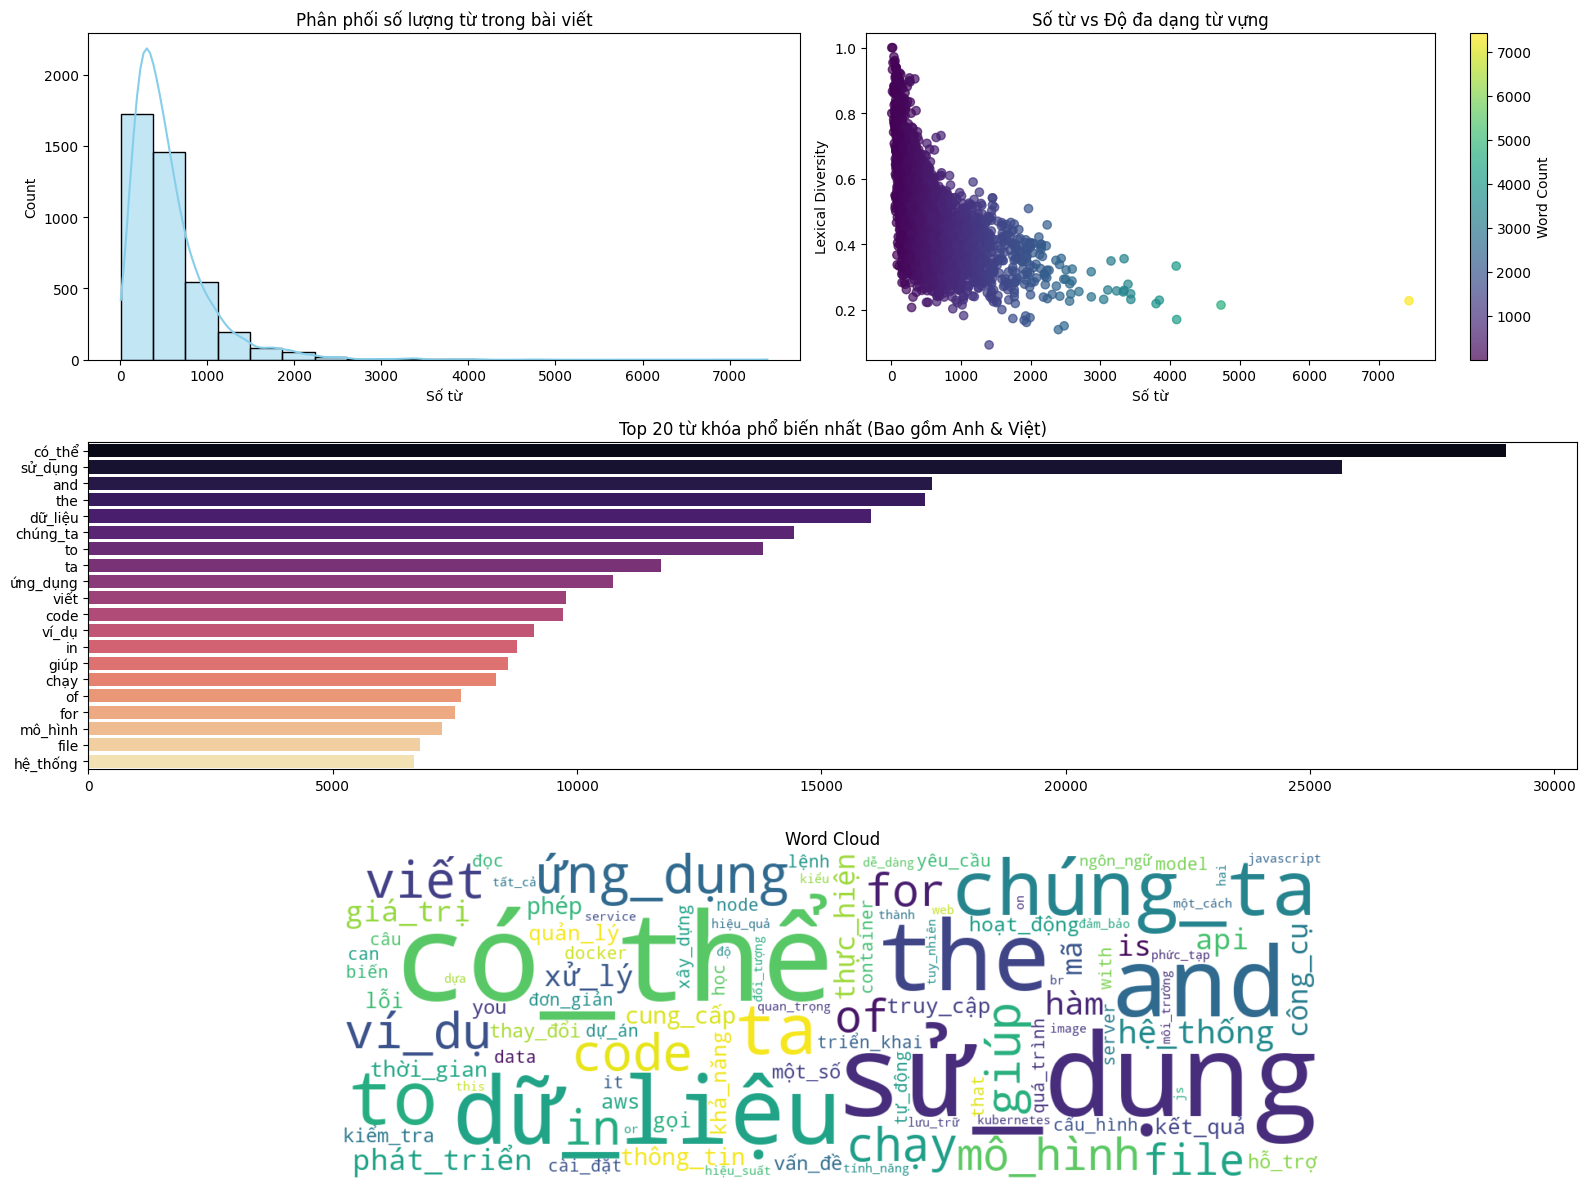

Hoàn tất!


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from collections import Counter
from wordcloud import WordCloud
from pyvi import ViTokenizer
from tqdm import tqdm

# --- 1. CẤU HÌNH ---
DATA_FILE = 'viblo_posts_top20.csv'
STOPWORDS_FILE = 'vietnamese-stopwords.txt'

# Load Stopwords
try:
    with open(STOPWORDS_FILE, 'r', encoding='utf-8') as f:
        stopwords = set(line.strip() for line in f if line.strip())
except:
    stopwords = set()
    print("Cảnh báo: Không tìm thấy file stopwords, sẽ chạy mà không lọc từ dừng.")

# Pre-compile Regex
RE_CODE_BLOCK = re.compile(r'```.*?```', flags=re.DOTALL)
RE_MARKDOWN_LINK = re.compile(r'!\[.*?\]\(.*?\)|\[.*?\]\(.*?\)')
RE_SPECIAL_CHARS = re.compile(r'[^\w\s_]') # Giữ lại chữ, số và dấu gạch dưới (cho các từ ghép)

def clean_and_process(text):
    """
    Hàm xử lý văn bản:
    - Giữ lại cả Tiếng Anh (Python, Java...) và Tiếng Việt.
    - Loại bỏ code block, link, ký tự đặc biệt.
    """
    if not isinstance(text, str) or not text.strip():
        return []
    
    # 1. Xóa Code block và Link Markdown (Rất quan trọng với bài viết kỹ thuật)
    text = RE_CODE_BLOCK.sub('', text)
    text = RE_MARKDOWN_LINK.sub('', text)
    
    # 2. Tokenize (Tách từ tiếng Việt: "học máy" -> "học_máy")
    try:
        tokenized_text = ViTokenizer.tokenize(text)
    except:
        return []

    # 3. Lọc từ
    # Lưu ý: Ở đây KHÔNG dùng regex check tiếng Việt để giữ lại từ tiếng Anh
    tokens = []
    for word in tokenized_text.lower().split():
        # Xóa ký tự đặc biệt dính vào từ (ví dụ: "python," -> "python")
        word = RE_SPECIAL_CHARS.sub('', word)
        
        if (word not in stopwords      # Bỏ từ dừng (thì, là, mà...)
            and len(word) > 1          # Bỏ từ quá ngắn (1 ký tự)
            and not word.isdigit()):   # Bỏ số thuần túy (123, 2024...)
            
            tokens.append(word)
    
    return tokens

# --- 2. XỬ LÝ DỮ LIỆU ---
if __name__ == '__main__':
    print(f"Đang đọc dữ liệu từ {DATA_FILE}...")
    try:
        df = pd.read_csv(DATA_FILE)
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file '{DATA_FILE}'")
        exit()

    # Kích hoạt tqdm cho Pandas
    tqdm.pandas(desc="Đang xử lý tách từ")

    # Chạy xử lý (Đơn luồng - Ổn định nhất trên Windows)
    df['tokens'] = df['content'].progress_apply(clean_and_process)

    # Lọc bỏ dòng rỗng
    original_count = len(df)
    df = df[df['tokens'].map(len) > 0].copy()
    print(f"Đã xử lý xong. Giữ lại {len(df)}/{original_count} bài viết.")

    # Tính toán thống kê
    print("Đang tính toán chỉ số...")
    df['word_count'] = df['tokens'].map(len)
    df['unique_word_count'] = df['tokens'].map(lambda x: len(set(x)))
    df['lexical_diversity'] = df['unique_word_count'] / df['word_count']

    # --- 3. VẼ BIỂU ĐỒ ---
    print("Đang vẽ biểu đồ...")
    fig = plt.figure(figsize=(16, 12))
    gs = plt.GridSpec(3, 2, figure=fig)

    # Biểu đồ 1: Histogram
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(df['word_count'], bins=20, kde=True, ax=ax1, color='skyblue')
    ax1.set_title("Phân phối số lượng từ trong bài viết")
    ax1.set_xlabel("Số từ")

    # Biểu đồ 2: Scatter Plot
    ax2 = fig.add_subplot(gs[0, 1])
    sc = ax2.scatter(
        df['word_count'],
        df['lexical_diversity'],
        c=df['word_count'],
        cmap='viridis',
        alpha=0.7
    )
    plt.colorbar(sc, ax=ax2, label='Word Count')
    ax2.set_title("Số từ vs Độ đa dạng từ vựng")
    ax2.set_xlabel("Số từ")
    ax2.set_ylabel("Lexical Diversity")

    # Chuẩn bị dữ liệu từ khóa
    all_tokens = [token for sublist in df['tokens'] for token in sublist]
    word_freq = Counter(all_tokens)

    # Top 20 từ khóa
    top_20 = word_freq.most_common(20)
    words = [w[0] for w in top_20]
    counts = [w[1] for w in top_20]

    # Biểu đồ 3: Bar Chart
    ax3 = fig.add_subplot(gs[1, :])
    sns.barplot(x=counts, y=words, hue=words, palette='magma', legend=False, ax=ax3)
    ax3.set_title("Top 20 từ khóa phổ biến nhất (Bao gồm Anh & Việt)")

    # Biểu đồ 4: Word Cloud (Đã sửa lỗi copy)
    ax4 = fig.add_subplot(gs[2, :])
    wc = WordCloud(
        width=1200, 
        height=400, 
        background_color='white', 
        max_words=100,
        colormap='viridis'
    ).generate_from_frequencies(word_freq)

    # --- SỬA LỖI QUAN TRỌNG TẠI ĐÂY ---
    ax4.imshow(wc.to_image(), interpolation='bilinear') 
    
    ax4.axis('off')
    ax4.set_title("Word Cloud")

    plt.tight_layout()
    plt.show()
    print("Hoàn tất!")

In [9]:
df.head()

,Unnamed: 0,id,title,content,tags,tags_pre_processed,tags_final,content_length,tokens,word_count,unique_word_count,lexical_diversity
0,0,89544,Analyzing XAUUSD Market Microstructure for Aut...,"Gold, traded as XAUUSD, is one of the most pop...",Blockchain|Paxos gold|Software developmen|trad...,"['blockchain', 'software development', 'tradin...",['blockchain'],6520,"[gold, traded, as, xauusd, is, one, of, the, m...",907,316,0.348401
1,1,89532,Creating a Multi-Service App: Essential Tips a...,"In today's rapidly evolving digital landscape,...",Business|AITechnology|computer|App Like Clone|...,"['ai', 'app like clone', 'business', 'computer...",['ai'],11240,"[in, today, rapidly, evolving, digital, landsc...",1652,760,0.460048
2,2,89496,Tìm hiểu Ingress trong Kubernetes: từ lý thuyế...,# 1. Tổng quan\nKhi mới bắt đầu với Kubernetes...,DevOps|ingress|K8s|nginx|ContentCreator,"['devops', 'ingress', 'k8s', 'nginx']",['devops'],9477,"[tổng_quan, bắt_đầu, kubernetes, câu, bối_rối,...",503,236,0.469185
3,3,89501,Thinking mode in Claude 4.5: All You need to Know,Anthropic’s Claude 4.5 family (notably *Sonnet...,cometapi,['cometapi'],['cometapi'],15103,"[anthropic, claude, family, notably, sonnet, a...",1757,704,0.400683
4,4,89498,AI trong E-commerce: Xu hướng tạm thời hay bướ...,"Trong những năm gần đây, **AI (Artificial Inte...",AI|e-commerce platform|Startup|AI E-commerce|c...,"['ai', 'ai e-commerce', 'customer-experience',...",['ai'],2960,"[artificial_intelligence, dần, trở_thành, khôn...",218,130,0.596330


In [14]:
df_clean1 = df.drop(columns = ["title", "id", "tags", "tags_pre_processed",'Unnamed: 0'])
df_clean1.head()

,content,tags_final,content_length,tokens,word_count,unique_word_count,lexical_diversity
0,"Gold, traded as XAUUSD, is one of the most pop...",['blockchain'],6520,"[gold, traded, as, xauusd, is, one, of, the, m...",907,316,0.348401
1,"In today's rapidly evolving digital landscape,...",['ai'],11240,"[in, today, rapidly, evolving, digital, landsc...",1652,760,0.460048
2,# 1. Tổng quan\nKhi mới bắt đầu với Kubernetes...,['devops'],9477,"[tổng_quan, bắt_đầu, kubernetes, câu, bối_rối,...",503,236,0.469185
3,Anthropic’s Claude 4.5 family (notably *Sonnet...,['cometapi'],15103,"[anthropic, claude, family, notably, sonnet, a...",1757,704,0.400683
4,"Trong những năm gần đây, **AI (Artificial Inte...",['ai'],2960,"[artificial_intelligence, dần, trở_thành, khôn...",218,130,0.596330


In [15]:
df.to_csv('clean_data.csv')

In [17]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

df = pd.read_csv("clean_data.csv")

df['tags_final'] = df['tags_final'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

df_plot = df.copy()
df_plot = df_plot.explode('tags_final')
df_plot = df_plot.dropna(subset=['tags_final'])

top_tags = [t for t, _ in Counter(df_plot['tags_final']).most_common(20)]
df_plot = df_plot[df_plot['tags_final'].isin(top_tags)]




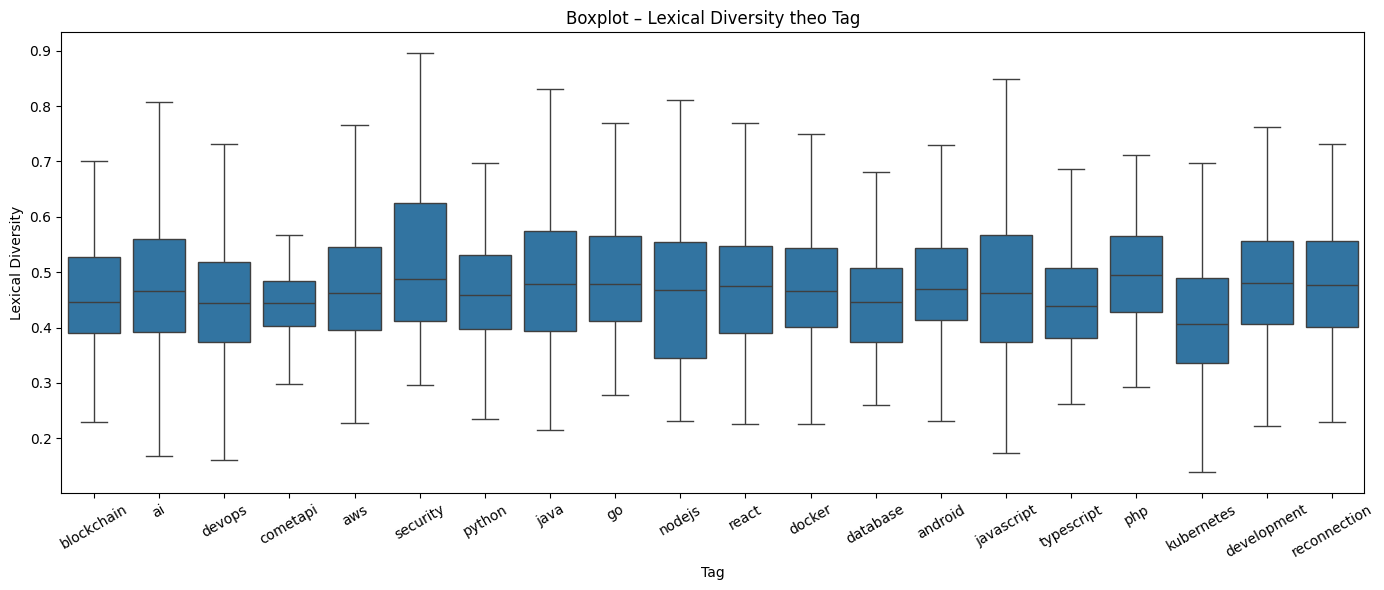

In [18]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_plot,
    x='tags_final',
    y='lexical_diversity',
    showfliers=False
)
plt.title('Boxplot – Lexical Diversity theo Tag')
plt.xlabel('Tag')
plt.ylabel('Lexical Diversity')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

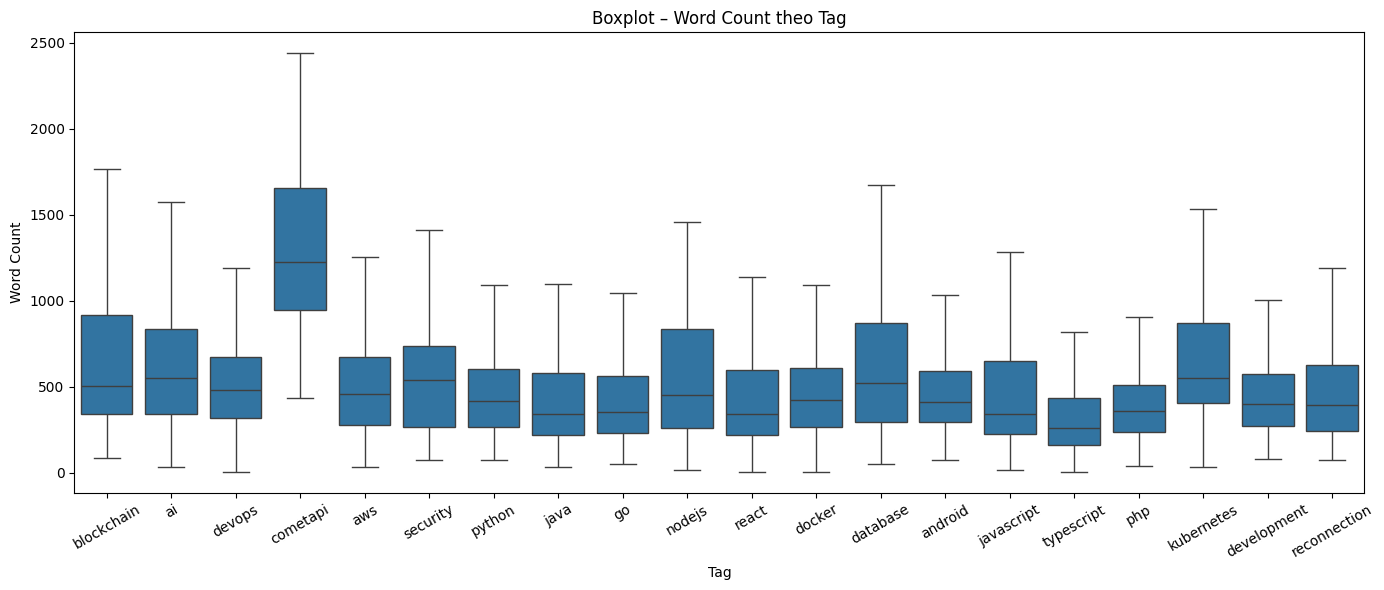

In [19]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_plot,
    x='tags_final',
    y='word_count',
    showfliers=False
)
plt.title('Boxplot – Word Count theo Tag')
plt.xlabel('Tag')
plt.ylabel('Word Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

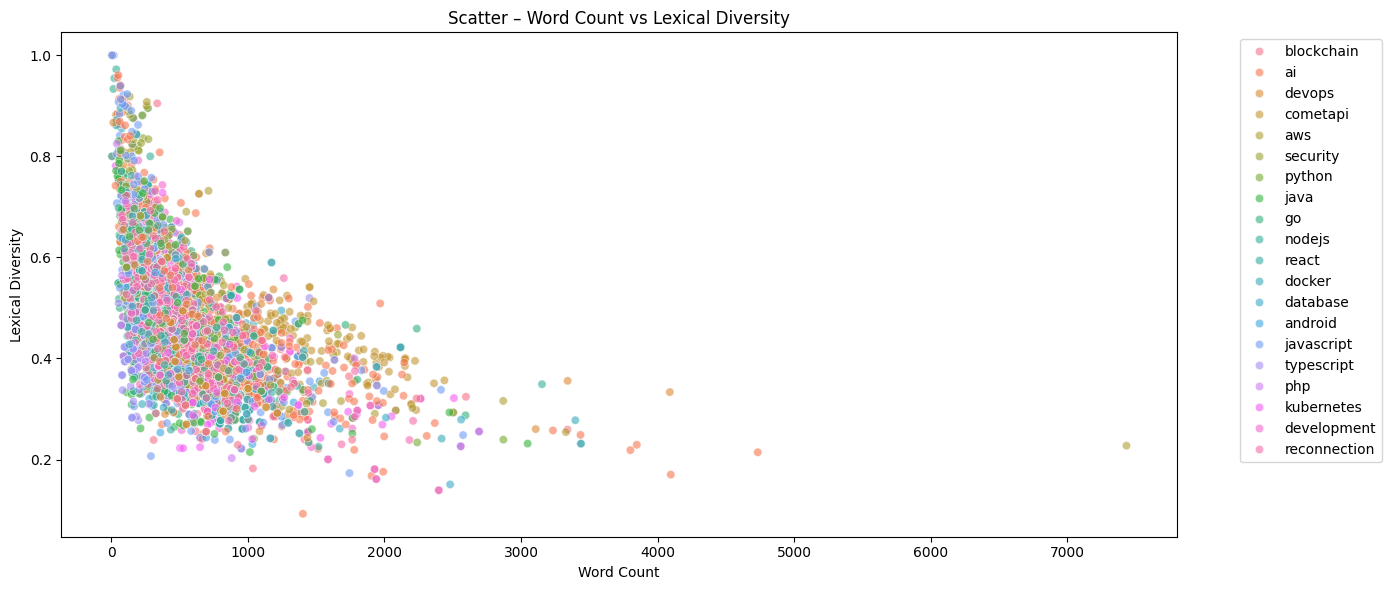

In [20]:
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=df_plot,
    x='word_count',
    y='lexical_diversity',
    hue='tags_final',
    alpha=0.6
)
plt.title('Scatter – Word Count vs Lexical Diversity')
plt.xlabel('Word Count')
plt.ylabel('Lexical Diversity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

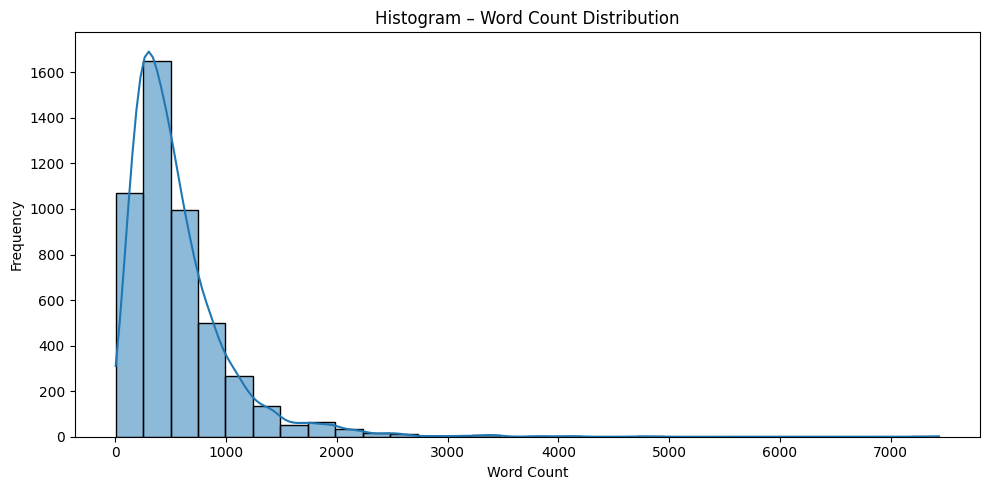

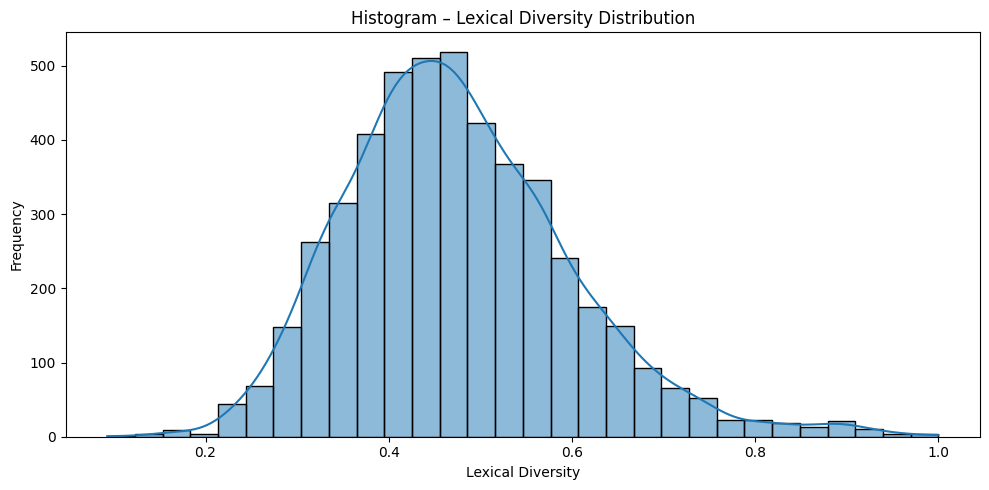

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df_plot['word_count'], bins=30, kde=True)
plt.title('Histogram – Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_plot['lexical_diversity'], bins=30, kde=True)
plt.title('Histogram – Lexical Diversity Distribution')
plt.xlabel('Lexical Diversity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

df_ngram = df_clean1.copy()

df_ngram['clean_text'] = df_ngram['tokens'].apply(
    lambda x: " ".join(x) if isinstance(x, list) else ""
)


def get_top_n_ngram(corpus, ngram=(2, 2), top_k=20, min_df=2):
    vec = CountVectorizer(
        ngram_range=ngram,
        lowercase=False,
        min_df=min_df,
        token_pattern=r"(?u)\b\w+\b"
    )
    X = vec.fit_transform(corpus)

    sum_words = X.sum(axis=0)
    freqs = [
        (word, int(sum_words[0, idx]))
        for word, idx in vec.vocabulary_.items()
    ]

    return (
        pd.DataFrame(freqs, columns=['ngram', 'count'])
        .sort_values('count', ascending=False)
        .head(top_k)
    )

df_bigram = get_top_n_ngram(
    df_ngram['clean_text'],
    ngram=(2, 2),
    top_k=20,
    min_df=2
)

print("TOP 20 BIGRAM")
display(df_bigram)


df_trigram = get_top_n_ngram(
    df_ngram['clean_text'],
    ngram=(3, 3),
    top_k=20,
    min_df=2
)

print("TOP 20 TRIGRAM")
display(df_trigram)


TOP 20 BIGRAM


,ngram,count
8714,có_thể sử_dụng,2321
1064,chúng_ta có_thể,1965
3462,cơ_sở dữ_liệu,1844
2446,tác vụ,1577
8459,truy vấn,1490
626,node js,1374
5,in the,1243
23520,ta có_thể,1196
2,of the,1173
6383,đoạn code,1143


TOP 20 TRIGRAM


,ngram,count
6535,div align center,621
6548,chúng_ta có_thể sử_dụng,304
76816,câu đừng ngại,272
76815,bất_kỳ câu đừng,271
12136,đừng ngại comment,225
90098,động_lực viết chất_lượng,218
72437,hy_vọng viết học,218
90099,viết chất_lượng tương_lai,218
76465,tương_lai bất_kỳ câu,218
90097,bút_bi động_lực viết,217
